<a href="https://colab.research.google.com/github/Mitshd/Machine-Learning/blob/main/D_R_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import keras
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf
data = pd.read_csv("sample_data/mnist_test.csv")
digits = data.pop("7")
digits_train = digits[0:7000]
digits_test = digits[7000:]
data_train = data[0:7000]
data_test = data[7000:]
digits_train = tf.keras.utils.to_categorical(digits_train)
digits_test = tf.keras.utils.to_categorical(digits_test)
def min_max_scaling(series):
    return (series) / (255)

for col in data_train.columns:
    data_train[col] = min_max_scaling(data_train[col])
for col in data_test.columns:
    data_test[col] = min_max_scaling(data_test[col])


<ipython-input-1-2c492d939144>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[col] = min_max_scaling(data_train[col])
<ipython-input-1-2c492d939144>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[col] = min_max_scaling(data_test[col])


In [ ]:
data_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
func_1 = ["relu", "sigmoid", "softmax", "softplus", "softsign", "tanh", "selu", "elu", "exponential"]
func_2 = []
number_of_units = []
loss_on_train = []
loss_on_test = []
accuracy_on_train = []
accuracy_on_test = []
mat_on_train = []
mat_on_test = []

for i in range(0,3000,100):
  for j in range(0,1):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(784,input_shape = (784,)))
    model.add(tf.keras.layers.Dense(4000,activation = "selu"))
    model.add(tf.keras.layers.Dense(1000 + i,activation = 'exponential'))

    model.add(tf.keras.layers.Dense(10,activation = "softmax"))
          #model.add(tf.keras.layers.Dense(1,activation = None))


    model.compile(
          optimizer = "SGD",
          loss = 'CategoricalCrossentropy',
          metrics = ["accuracy"],
          loss_weights = None,
          sample_weight_mode = None,
          weighted_metrics = None,
          target_tensors = None
          )

    model.fit(data_train, digits_train,validation_data=(data_test, digits_test),
    # it will use 'batch_size' number
    # of examples per example
    batch_size = 700,
    epochs = 20,  # total epoch
    )
    train_loss, train_acc  = model.evaluate(data_train,  digits_train)
    test_loss, test_acc  = model.evaluate(data_test,  digits_test)
    number_of_units.append(i+1000)

    loss_on_train.append(train_loss)
    accuracy_on_train.append(train_acc)
    loss_on_test.append(test_loss)
    accuracy_on_test.append(test_acc)
    plt.plot(number_of_units,loss_on_train, color = "green")
    plt.plot(number_of_units,loss_on_test, color = "red")
    plt.plot(number_of_units,accuracy_on_train, color = "yellow")
    plt.plot(number_of_units,accuracy_on_test, color = "blue")
    plt.show
    digits_train_predict = model.predict(data_train)
    con_mat = tf.math.confusion_matrix(labels=digits_train.argmax(axis=1), predictions=digits_train_predict.argmax(axis=1)).numpy()
    mat_on_train.append(con_mat)
    digits_test_predict = model.predict(data_test)
    con_mat = tf.math.confusion_matrix(labels=digits_train.argmax(axis=1), predictions=digits_train_predict.argmax(axis=1)).numpy()
    mat_on_test.append(con_mat)

plt.plot(number_of_units,loss_on_train, color = "green")
plt.show
plt.plot(number_of_units,loss_on_test, color = "red")
plt.show
plt.plot(number_of_units,accuracy_on_train, color = "yellow")
plt.show
plt.plot(number_of_units,accuracy_on_test, color = "blue")
plt.show

print(accuracy_on_train[loss_on_train.index(min(loss_on_train))])
print(min(loss_on_train))
print(number_of_units[loss_on_train.index(min(loss_on_train))])
print(accuracy_on_test[loss_on_train.index(min(loss_on_train))])
print(loss_on_test[loss_on_train.index(min(loss_on_train))])
print(accuracy_on_test[loss_on_test.index(min(loss_on_test))])
print(min(loss_on_test))
print(number_of_units[loss_on_test.index(min(loss_on_test))])
print(accuracy_on_train[loss_on_test.index(min(loss_on_test))])
print(loss_on_train[loss_on_test.index(min(loss_on_test))])


Epoch 1/20
10/10 [==============================] - 14s 1s/step - loss: 1.9758 - accuracy: 0.4537 - val_loss: 1.2169 - val_accuracy: 0.7372
Epoch 2/20
10/10 [==============================] - 14s 1s/step - loss: 1.0802 - accuracy: 0.7586 - val_loss: 0.8542 - val_accuracy: 0.8026
Epoch 3/20
10/10 [==============================] - 14s 1s/step - loss: 0.8278 - accuracy: 0.8007 - val_loss: 0.6945 - val_accuracy: 0.8309
Epoch 4/20
10/10 [==============================] - 9s 885ms/step - loss: 0.6922 - accuracy: 0.8331 - val_loss: 0.5950 - val_accuracy: 0.8550
Epoch 5/20
10/10 [==============================] - 7s 737ms/step - loss: 0.6204 - accuracy: 0.8434 - val_loss: 0.5380 - val_accuracy: 0.8636
Epoch 6/20
10/10 [==============================] - 9s 839ms/step - loss: 0.5634 - accuracy: 0.8544 - val_loss: 0.4920 - val_accuracy: 0.8673
Epoch 7/20
10/10 [==============================] - 8s 841ms/step - loss: 0.5237 - accuracy: 0.8607 - val_loss: 0.4678 - val_accuracy: 0.8806
Epoch 8/20
1

<ipython-input-4-da5795c1b38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[col] = min_max_scaling(data_test[col])


In [5]:
for col in data_test.columns:
    print(data_test[col].max())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.058823529411764705
0.9098039215686274
0.8980392156862745
0.6823529411764706
0.9058823529411765
0.996078431372549
0.24705882352941178
0.5686274509803921
0.996078431372549
0.996078431372549
0.6196078431372549
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.23137254901960785
0.984313725490196
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.996078431372549
1.0
0.9176470588235294
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5450980392156862
0.4470588235294118
0.5725490196078431
1.0
0.9921568627450981
0.9921568627450981
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8980392156862745
0.9450980392156862
0.9176470588235294
0.6392156862745098
0.0
0.0
0.0
0.0
0.21568627450980393
0.403921568627451
0.4588235294117647
0.9921568627450981
1.0
0.996078431372549
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9921568627450981
1.0


Epoch 1/20
10/10 [==============================] - 6s 450ms/step - loss: 2.0731 - accuracy: 0.4110 - val_loss: 1.2971 - val_accuracy: 0.6852
Epoch 2/20
10/10 [==============================] - 6s 583ms/step - loss: 1.1228 - accuracy: 0.7401 - val_loss: 0.9183 - val_accuracy: 0.7749
Epoch 3/20
10/10 [==============================] - 10s 972ms/step - loss: 0.8499 - accuracy: 0.7929 - val_loss: 0.7276 - val_accuracy: 0.8139
Epoch 4/20
10/10 [==============================] - 4s 399ms/step - loss: 0.7025 - accuracy: 0.8279 - val_loss: 0.6243 - val_accuracy: 0.8406
Epoch 5/20
10/10 [==============================] - 5s 503ms/step - loss: 0.6189 - accuracy: 0.8403 - val_loss: 0.5619 - val_accuracy: 0.8513
Epoch 6/20
10/10 [==============================] - 5s 504ms/step - loss: 0.5607 - accuracy: 0.8540 - val_loss: 0.5140 - val_accuracy: 0.8646
Epoch 7/20
10/10 [==============================] - 7s 770ms/step - loss: 0.5176 - accuracy: 0.8613 - val_loss: 0.4759 - val_accuracy: 0.8693
Epoch

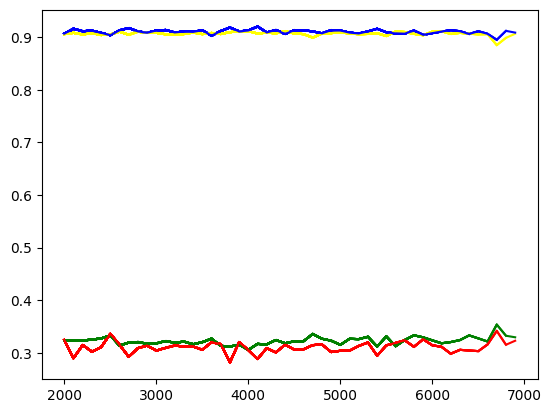

<function matplotlib.pyplot.show(close=None, block=None)>

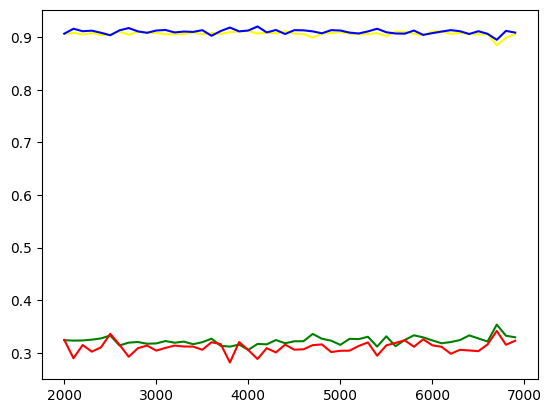

In [8]:
print(number_of_units)
print(y)
print(z)
print(t)


NameError: ignored

0.9118571281433105
0.30534660816192627
4000
0.912971019744873
0.3049890398979187
0.9186395406723022
0.28138265013694763
3800
0.9098571538925171
0.31160569190979004


In [10]:
print(mat_on_train[loss_on_train.index(min(loss_on_train))])
print(mat_on_test[loss_on_test.index(min(loss_on_test))])


[[649   0   3   3   1   3   5   1   6   1]
 [  0 770   1   6   1   3   4   0  11   0]
 [  2   6 648  10  12   3  12  19  11   6]
 [  1   3  12 632   1  19   2  11   7  14]
 [  2   4   1   0 649   1   7   0   5  31]
 [  4   5   5  20   7 552   9   4  19   8]
 [  7   3   5   1  11   8 616   0   4   1]
 [  5  14  12   5  10   3   0 622   2  38]
 [  5   9   7  18   7  17   4   2 600  13]
 [  6   7   1  10  30   5   1   8   6 645]]
[[653   0   1   2   1   4   6   1   3   1]
 [  0 774   2   5   1   2   3   0   9   0]
 [  2   4 646  16   9   2  12  20  13   5]
 [  1   3  12 642   1  21   1  10   2   9]
 [  1   4   5   0 632   1   9   1   8  39]
 [  6   5   5  29   7 550   5   5  14   7]
 [  9   3   5   1   8   9 617   0   4   0]
 [  3  17  13   6  13   2   0 620   3  34]
 [  6   7   7  23   5  20   3   4 595  12]
 [  4   8   4  11  23  10   0  11   8 640]]


In [ ]:
plt.plot(x,y, color = "green",)

In [ ]:
con_mat = tf.math.confusion_matrix(labels=digits_train.argmax(axis=1), predictions=digits_train_predict.argmax(axis=1)).numpy()


In [2]:
print(z[y.index(min(y))])
print(min(y))
print(max(y))
print(x[y.index(min(y))])

NameError: ignored

# New Section

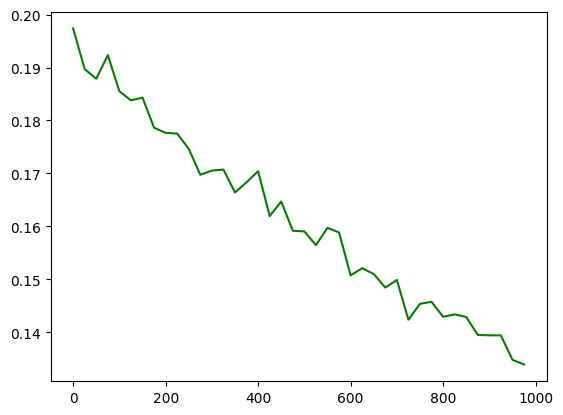

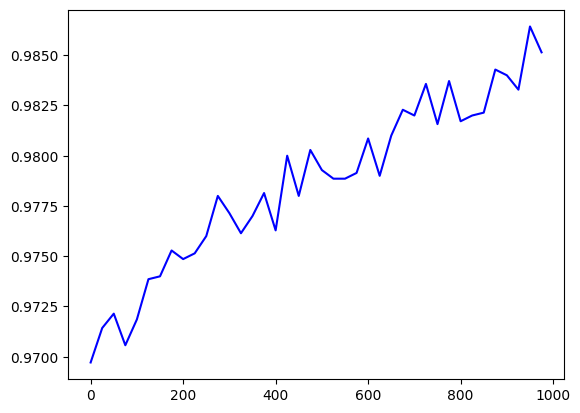

In [ ]:
plt.plot(x,y, color = "green")
plt.show()
#plt.plot(x,z, color = "red")
plt.plot(x,z, color = "blue")
plt.show()

In [ ]:
data_train.to_numpy()
data_test.to_numpy()
digits_train.to_numpy()
digits_test.to_numpy()

array([2, 2, 5, ..., 4, 5, 6])

In [ ]:
data_train.iloc[12]

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Name: 12, Length: 784, dtype: int64

In [ ]:
#no need to run this anymore
def convert(x):
  arr = [0,0,0,0,0,0,0,0,0,0]
  arr[x] = 1
  return(arr)
digit_train = []
for i in range(len(digits_train)):
  arr = convert(digits_train[i])
  digit_train.append(arr)
digit_test = []
for i in range(len(digits_test)):

  arr = convert(digits_test[i + 7000])
  digit_test.append(arr)

In [ ]:
digits_train = digits_train/10

In [ ]:
digits_test = digits_test/10

In [ ]:
0.9984285831451416
0.056694917380809784
0.19200673699378967
5000

In [ ]:
a = min(t)
b = y.index(a)
print(x[b])

ValueError: ignored

In [ ]:
print(y[b])

0.09600000083446503


In [ ]:
|model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 1050)              106050    
                                                                 
 dense_14 (Dense)            (None, 1)                 1051      
                                                                 
Total params: 185,601
Trainable params: 185,601
Non-trainable params: 0
_________________________________________________________________


type(data_test)


In [ ]:
print(train_acc)

0.0038571427576243877


219/219 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0833 - precision: 0.9228
Train accuracy: 0.08328571170568466
Train loss: 0.0
Train precision: 0.9228100776672363


In [ ]:
test_loss, test_acc, test_prec = model.evaluate(data_test,  digits_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)
print('Test precision:', test_prec)

94/94 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - precision: 0.9597
Test accuracy: 0.09903301298618317
Test loss: 0.0
Test precision: 0.9597069621086121


In [ ]:
digit_predict = model.predict(data_test)

94/94 [==============================] - 1s 10ms/step


In [ ]:
digit2_predict = model.predict(data_train)

219/219 [==============================] - 2s 7ms/step


In [ ]:
np.argmax(digit2_predict[1])

1

In [ ]:
def image_show(a):
   x = pd.DataFrame(data_test).to_numpy()
   z = []
   y = []
   for j in range(len(x[a][1:])):

     b = [x[a][0:][j]%256,0,0]
     y.append(b)
     #print(y,len(y),i)

     if len(y) == 28:
         #print("ahahah")
         z.append(y)
         y = []

   return z


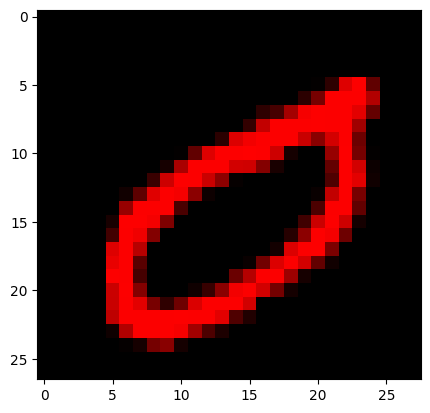

0 8


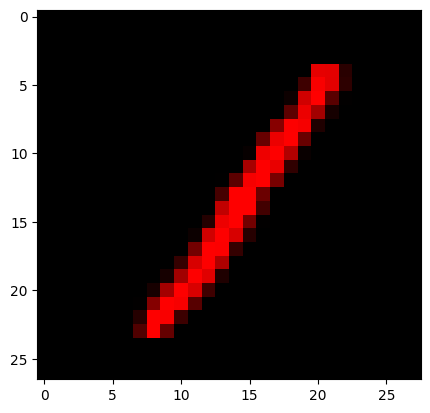

1 1


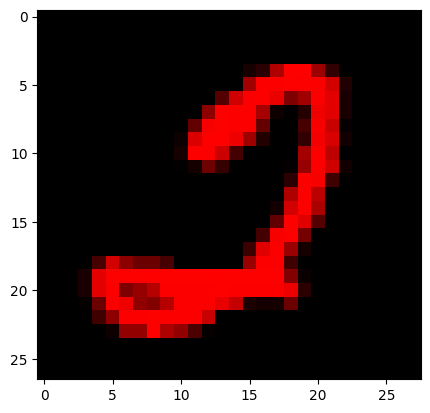

0 2


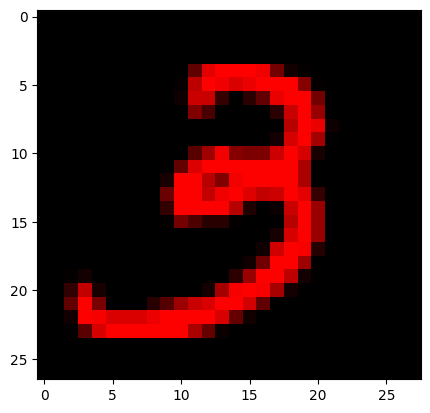

3 5


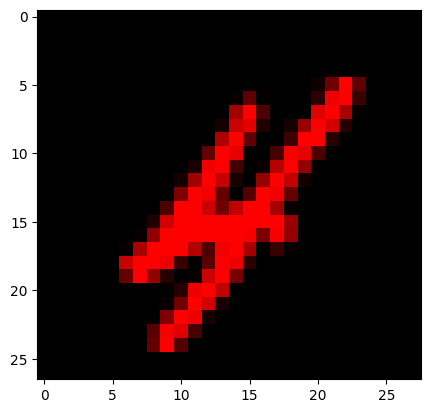

4 6


In [ ]:
import random
var1 = random.randint(0,3000)
for a in range(var1,var1 + 5):
  z = image_show(a)

  imgplot = plt.imshow(z)
  plt.show()
  #var = digit_predict[a]
  #var = float(var)
  #print(round(var))
  print(np.argmax(digit_predict[a]),np.argmax(digits_train[a]))

In [ ]:
digits_test.iloc[0]

7    2
Name: 7000, dtype: int64